In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy.integrate import solve_ivp
from load_data import load_data

In [2]:
data = load_data("bianconi-barabasi_10000_5")

Loading dataset: Completed!


In [3]:
data

run                                    0                           1        \
compartment                             S    E    I    R    D       S    E   
reaction fear     feedback t                                                 
none     none     none     0.000   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.125   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.250   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.375   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.500   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
...                                   ...  ...  ...  ...  ...     ...  ...   
cut      anticorr all      89.875     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.000     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.125     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.250     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.375     NaN  NaN  NaN  NaN  NaN     NaN  NaN   

run                                               ...      98                 \
compartment                          I    R    D  ...       S    E    I    R   
reaction fear     feedback t                      ...                          
none     none     none     0.000   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.125   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.250   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.375   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.500   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
...                                ...  ...  ...  ...     ...  ...  ...  ...   
cut      anticorr all      89.875  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.000  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.125  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.250  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.375  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   

run                                         99                      
compartment                          D       S    E    I    R    D  
reaction fear     feedback t                                        
none     none     none     0.000   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.125   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.250   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.375   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.500   0.0  9999.0  0.0  1.0  0.0  0.0  
...                                ...     ...  ...  ...  ...  ...  
cut      anticorr all      89.875  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.000  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.125  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.250  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.375  NaN     NaN  NaN  NaN  NaN  NaN  

[66363 rows x 500 columns]

In [4]:
I_no_feedback = data.xs(("none","none","none"), level=[0,1,2]).xs("I",axis=1,level="compartment")
I_no_feedback

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.125,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def SEIR(t, y, beta, mu, gamma):
    dSdt = -beta*y[0]*y[2]
    dEdt = beta*y[0]*y[2] - mu*y[1]
    dIdt = mu*y[1] - gamma*y[2]
    dRdt = gamma*y[2]
    return np.array([dSdt,dEdt,dIdt,dRdt])

y0 = np.array([10000-2,0,2,0]) / 10000
results = solve_ivp(SEIR, (0,I_no_feedback.index.max()), y0, args=(1/2,1/2,1/6), t_eval=I_no_feedback.index)

I = results.y[2] * 10000
t = results.t

In [6]:
list_series = {}
argmax_det = t[np.argmax(I)]
max_det = np.max(I)
for col in I_no_feedback:
    series = I_no_feedback[col].copy()
    series.index = series.index - series.idxmax() + argmax_det
    series = series / series.max() * max_det
    list_series[col] = series
traslated_no_feedback = pd.concat(list_series, axis=1).sort_index()
traslated_no_feedback

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
-5.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


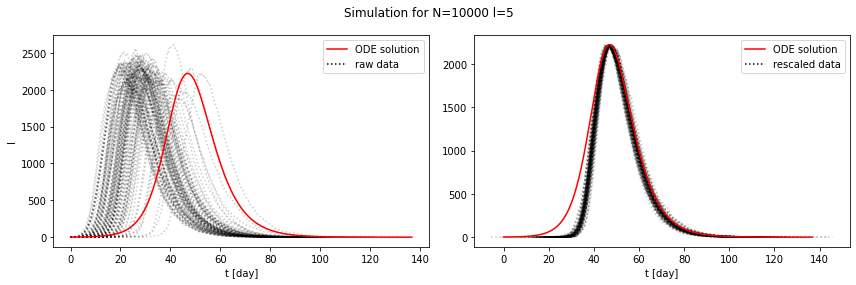

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle("Simulation for N=10000 l=5")
line1 = Line2D([0,1],[0,1], color="r")
line2 = Line2D([0,1],[0,1], linestyle=":", color="k")

I_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[0])
axs[0].plot(t,I, color="r")
axs[0].set_xlabel("t [day]")
axs[0].set_ylabel("I")
axs[0].legend(handles=[line1,line2], labels=["ODE solution", "raw data"])

for col in traslated_no_feedback:
    traslated_no_feedback[col].copy().dropna().plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[1])
axs[1].plot(t,I, color="r")
axs[1].set_xlabel("t [day]")
axs[1].legend(handles=[line1,line2], labels=["ODE solution", "rescaled data"])

fig.tight_layout()
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l5.pdf")
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l5.png")

In [8]:
data = load_data("bianconi-barabasi_10000_10")

Loading dataset: Completed!


In [9]:
data

run                                    0                           1        \
compartment                             S    E    I    R    D       S    E   
reaction fear     feedback t                                                 
none     none     none     0.000   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.125   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.250   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.375   9999.0  0.0  1.0  0.0  0.0  9998.0  1.0   
                           0.500   9999.0  0.0  1.0  0.0  0.0  9998.0  1.0   
...                                   ...  ...  ...  ...  ...     ...  ...   
cut      anticorr all      95.750     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           95.875     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           96.000     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           96.125     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           96.250     NaN  NaN  NaN  NaN  NaN     NaN  NaN   

run                                               ...      98                 \
compartment                          I    R    D  ...       S    E    I    R   
reaction fear     feedback t                      ...                          
none     none     none     0.000   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.125   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.250   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.375   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.500   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
...                                ...  ...  ...  ...     ...  ...  ...  ...   
cut      anticorr all      95.750  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           95.875  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           96.000  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           96.125  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           96.250  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   

run                                         99                      
compartment                          D       S    E    I    R    D  
reaction fear     feedback t                                        
none     none     none     0.000   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.125   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.250   0.0  9998.0  1.0  1.0  0.0  0.0  
                           0.375   0.0  9998.0  1.0  1.0  0.0  0.0  
                           0.500   0.0  9998.0  1.0  1.0  0.0  0.0  
...                                ...     ...  ...  ...  ...  ...  
cut      anticorr all      95.750  NaN     NaN  NaN  NaN  NaN  NaN  
                           95.875  NaN     NaN  NaN  NaN  NaN  NaN  
                           96.000  NaN     NaN  NaN  NaN  NaN  NaN  
                           96.125  NaN     NaN  NaN  NaN  NaN  NaN  
                           96.250  NaN     NaN  NaN  NaN  NaN  NaN  

[66867 rows x 500 columns]

In [10]:
I_no_feedback = data.xs(("none","none","none"), level=[0,1,2]).xs("I",axis=1,level="compartment")
I_no_feedback

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.125,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def SEIR(t, y, beta, mu, gamma):
    dSdt = -beta*y[0]*y[2]
    dEdt = beta*y[0]*y[2] - mu*y[1]
    dIdt = mu*y[1] - gamma*y[2]
    dRdt = gamma*y[2]
    return np.array([dSdt,dEdt,dIdt,dRdt])

y0 = np.array([10000-2,0,2,0]) / 10000
results = solve_ivp(SEIR, (0,I_no_feedback.index.max()), y0, args=(1/2,1/2,1/6), t_eval=I_no_feedback.index)

I = results.y[2] * 10000
t = results.t

In [12]:
list_series = {}
argmax_det = t[np.argmax(I)]
max_det = np.max(I)
for col in I_no_feedback:
    series = I_no_feedback[col].copy()
    series.index = series.index - series.idxmax() + argmax_det
    series = series / series.max() * max_det
    list_series[col] = series
traslated_no_feedback = pd.concat(list_series, axis=1).sort_index()
traslated_no_feedback

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
2.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


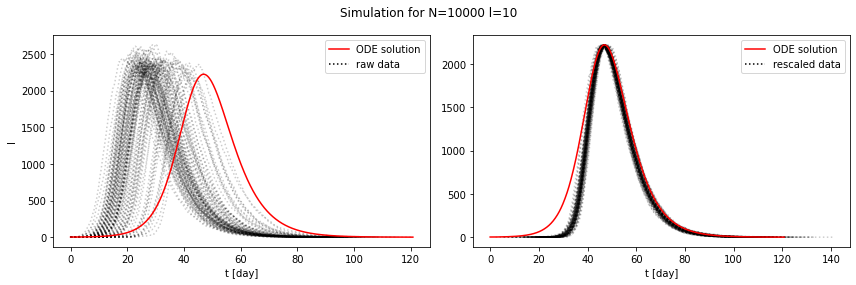

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle("Simulation for N=10000 l=10")
line1 = Line2D([0,1],[0,1], color="r")
line2 = Line2D([0,1],[0,1], linestyle=":", color="k")

I_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[0])
axs[0].plot(t,I, color="r")
axs[0].set_xlabel("t [day]")
axs[0].set_ylabel("I")
axs[0].legend(handles=[line1,line2], labels=["ODE solution", "raw data"])

for col in traslated_no_feedback:
    traslated_no_feedback[col].dropna().plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[1])
axs[1].plot(t,I, color="r")
axs[1].set_xlabel("t [day]")
axs[1].legend(handles=[line1,line2], labels=["ODE solution", "rescaled data"])

fig.tight_layout()
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l10.pdf")
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l10.png")